# ITMAL - BREAKING THE CURSE OF DIMENSIONALITY

**Feature extraction and dimensionality reduction**

### Introduction
In this exercise we look at the dimensions of our data. We will try to speed up model training by compressing data. This means that we will reduce the dimensions of our data to get a quicker training time. We also will use compression to try to reduce noise in the data.

In [37]:
from six.moves import urllib
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, cache=True)


In [38]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


## ASSIGNMENT "speed up by compression" for J2:

See how much you can speed up the above while retaining similar performance, by training on compressed data. (Don't forget to transform your test data too). 

In [107]:
from sklearn.linear_model import LogisticRegression
import time

pca_speed = PCA(n_components = 60)

X_compressed_train = pca_speed.fit_transform(X_train)
X_compressed_test = pca_speed.transform(X_test)


logisticRegr = LogisticRegression(solver = 'lbfgs',max_iter = 1000, multi_class = 'multinomial')

time_start = time.time()
logisticRegr.fit(X_compressed_train, y_train)
print('logisticRegr done! Time elapsed: {} seconds'.format(time.time()-time_start))


logisticRegr.score(X_compressed_test, y_test)


logisticRegr done! Time elapsed: 55.94407868385315 seconds


0.9101142857142858

**Answer: Around 60 components is the least time spent training while still having around the same score.**

## ASSIGNMENT "noise reduction" for J2:

Add some noise to MNIST (done below already), then compare a classifier trained and tested on:

Case 1: The noisy data.

Case 2: A PCA reduced version of the noisy data (remember to transform your test data too).

Can you find a reduced number of components that boosts performance? Different classifiers may handle noise more or less well by themselves. I tested with the SGDClassifier.


Text(0.5, 1.0, 'Noisy')

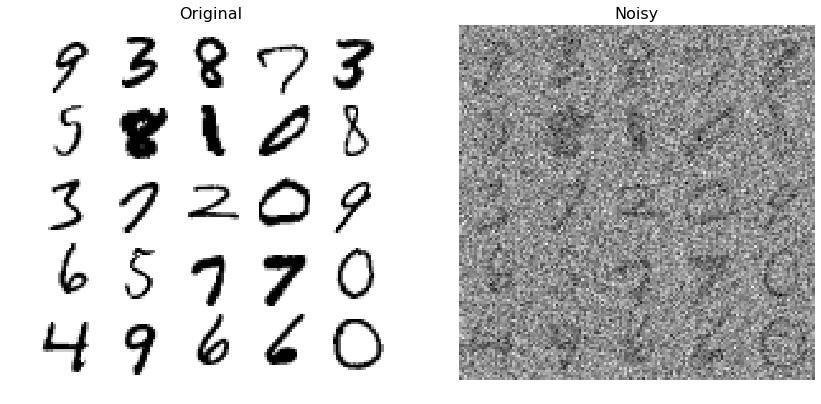

In [108]:
#generate noisy data
np.random.seed(42)
X_train_noisy = np.random.normal(X_train, 200)
X_test_noisy = np.random.normal(X_test, 200)

plt.figure(figsize=(14, 8))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_train_noisy[::2100])
plt.title("Noisy", fontsize=16)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdf_clf = RandomForestClassifier(random_state=42)

rdf_clf.fit(X_train_noisy, y_train)
rdf_y_predict = rdf_clf.predict(X_test_noisy)

accuracy_score(y_test, rdf_y_predict)

0.32148571428571426

In [133]:
rdf_clf_2 = RandomForestClassifier(random_state=42)

X_compressed_test_noisy = pca.transform(X_test_noisy)

rdf_clf_2.fit(X_reduced, y_train)
rdf_y_predict2 = rdf_clf_2.predict(X_compressed_test_noisy)

accuracy_score(y_test, rdf_y_predict2)

0.7098857142857142

**Answer: It looks like it predicts better when the data has been compressed by PCA.**

## ASSIGNMENT "PCA -> t-SNE features" for J2

From the above visualizations it seems reasonable that "PCA -> t-SNE" will perform much better than PCA alone 
as feature extraction by compression as input to a classifier (and be faster than t-SNE alone too).

Try if you can train and test with "PCA -> t-SNE" components (like we did earlier with PCA components). If not, explain why. 

**Answer: Since t-SNE is mostly used for visualization it seems that we cannot transform our test data to resemble the training data in dimensions. We can therefore only train and but not test with PCA -> t-SNE.**

### Conclusion
We look at how compression can be used to speed up training process. Compression works by reducing dimensions/features. By studying the data we can decide how many of the features in the data that are not used in the classification process. By the use of compression we also found out that noise can be reduced in data. By reducing the noise we can classify much better than trying to classify on the orignal noisy data. We find that there are better solutions to feature extraction than PCA. Unfortunate it is only used for visualization and is it not a viable feature extraction method.